In [318]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [319]:
# loading our dataframes

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

Merge df_m and df_p

In [320]:
df_m.head(n=5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [321]:
df_p.head(n=5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [322]:
df_p.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [323]:
df_m.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [324]:
df_p.rename(columns={'Medu': 'Mothers education', 'Fedu': 'Fathers education'}, inplace= True)

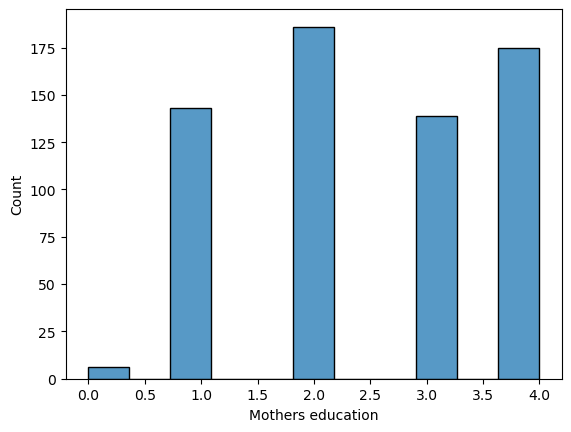

In [325]:
sns.histplot(df_p["Mothers education"])
plt.show()

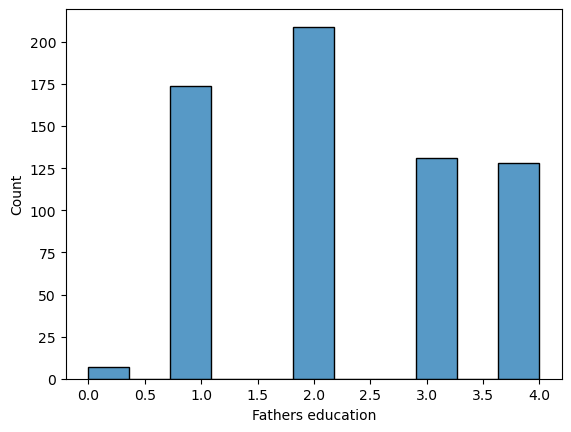

In [326]:
sns.histplot(df_p["Fathers education"])
plt.show()

In [327]:
df_m.rename(columns={'Medu': 'Mothers education', 'Fedu': 'Fathers education'}, inplace= True)

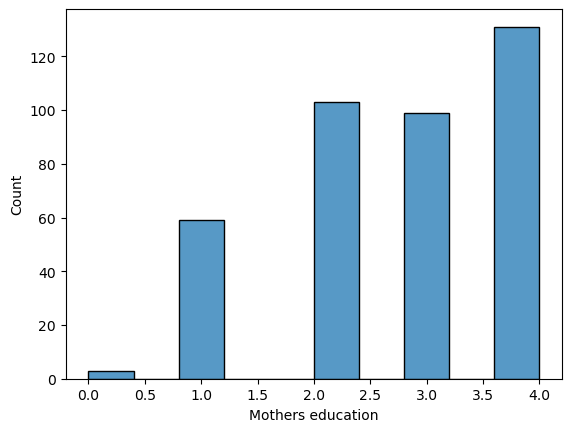

In [328]:
sns.histplot(df_m["Mothers education"])
plt.show()

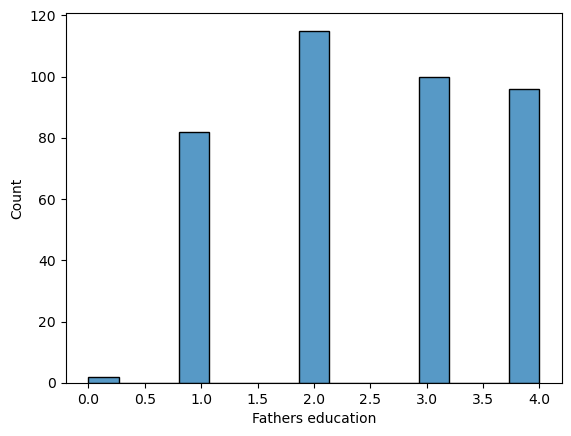

In [329]:
sns.histplot(df_m["Fathers education"])
plt.show()

In [330]:
edu_m = df_m["Fathers education"] + df_m["Mothers education"]



edu_p = df_p["Fathers education"] + df_p["Mothers education"]





<Axes: ylabel='Count'>

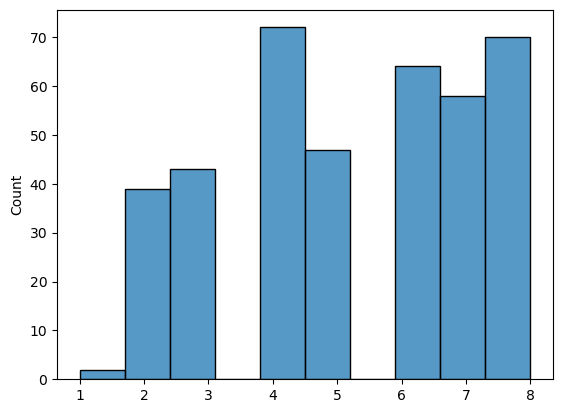

In [331]:
sns.histplot(edu_m)

<Axes: ylabel='Count'>

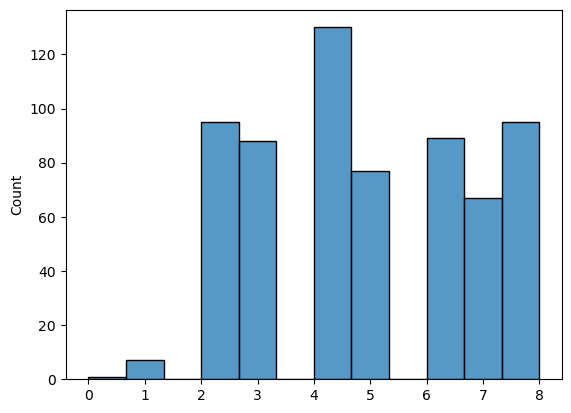

In [332]:
sns.histplot(edu_p)

In [333]:
edu_pvaluecounts = edu_p.value_counts()
edu_mvaluecounts = edu_m.value_counts()



In [334]:
edu_mvaluecounts

4    72
8    70
6    64
7    58
5    47
3    43
2    39
1     2
Name: count, dtype: int64

In [335]:
edu_pvaluecounts

4    130
8     95
2     95
6     89
3     88
5     77
7     67
1      7
0      1
Name: count, dtype: int64

In [336]:
m_grades = df_m["G2"] + df_m["G1"] + df_m["G3"]
m_grades.head()


0    17
1    16
2    25
3    44
4    26
dtype: int64

<Axes: ylabel='Count'>

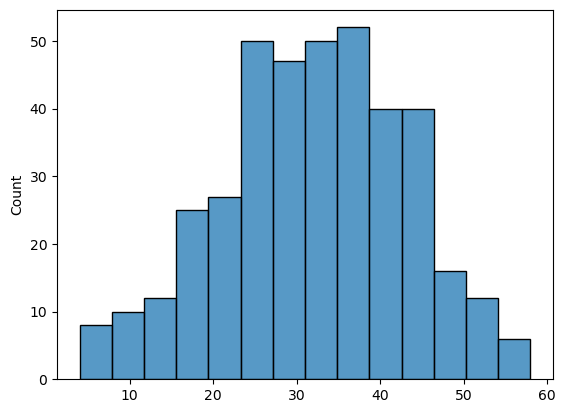

In [337]:
sns.histplot(m_grades)

In [338]:
p_grades = df_p["G2"] + df_p["G1"] + df_p["G3"]
p_grades.head()

0    22
1    31
2    37
3    42
4    37
dtype: int64

<Axes: ylabel='Count'>

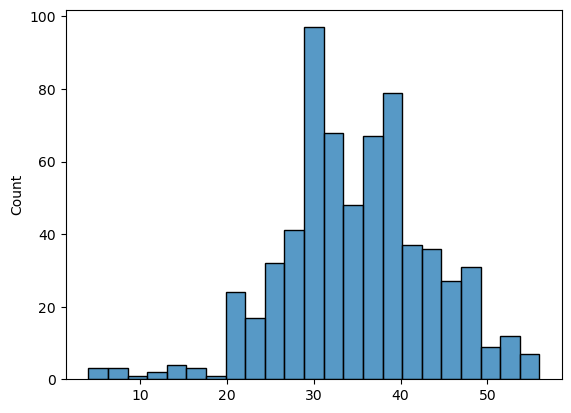

In [339]:
sns.histplot(p_grades)

In [340]:
pg_vc =p_grades.value_counts()
pg_vc

30    42
37    38
32    37
39    33
33    31
36    29
31    29
29    26
34    25
38    25
35    23
41    22
28    21
44    21
40    21
27    20
26    20
43    15
42    15
45    14
46    13
25    12
48    12
47    12
22    11
24     9
23     8
21     8
49     7
52     7
51     7
54     6
20     5
53     5
14     3
50     2
7      2
17     2
5      2
9      1
12     1
8      1
19     1
16     1
4      1
15     1
56     1
13     1
Name: count, dtype: int64

In [341]:
mg_vc= m_grades.value_counts()
mg_vc

27    23
28    21
37    16
30    15
35    14
32    14
38    13
46    13
34    13
33    13
24    12
41    12
29    11
39    11
40    10
31    10
19    10
36     9
43     9
45     9
44     9
25     9
23     8
21     8
16     8
11     7
42     7
13     6
26     6
22     6
20     5
17     5
47     5
48     4
50     4
54     4
15     3
7      3
53     3
49     3
52     3
56     3
5      2
18     2
12     2
51     2
55     2
6      2
9      1
10     1
4      1
8      1
58     1
14     1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

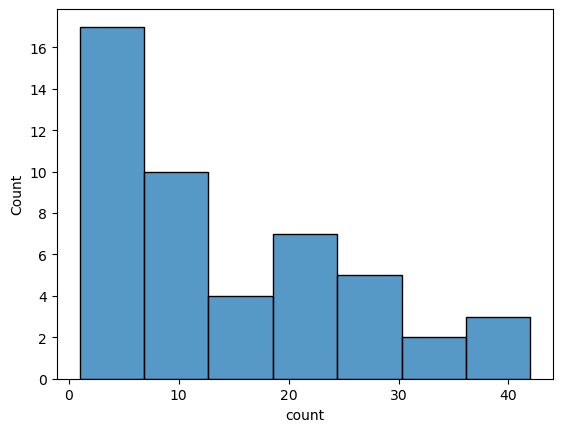

In [342]:
sns.histplot(pg_vc)

<Axes: xlabel='count', ylabel='Count'>

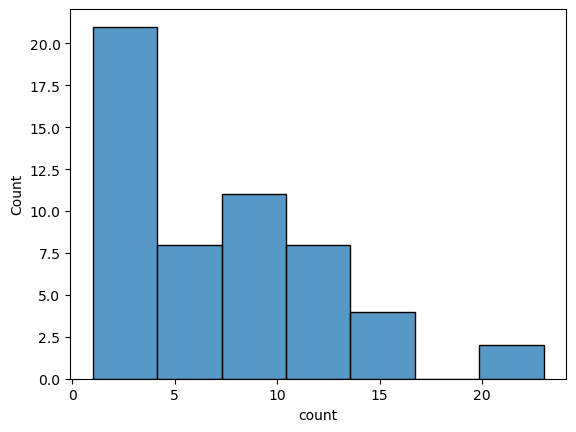

In [343]:
sns.histplot(mg_vc)

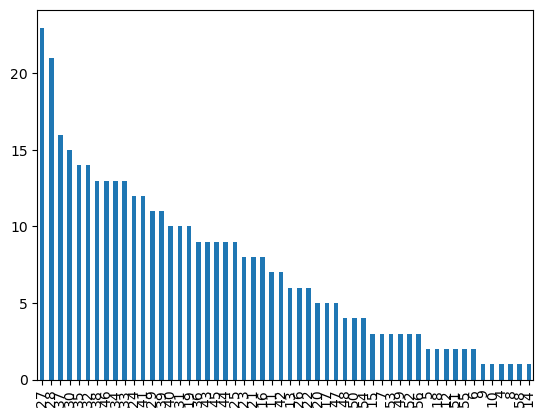

In [344]:
mg_vc.plot.bar()
plt.show()

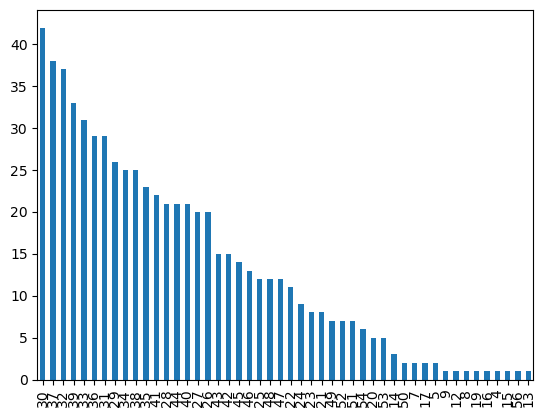

In [345]:
pg_vc.plot.bar()
plt.show()

Separate mother vs father for each class, (mothers have more impact?)

<Axes: >

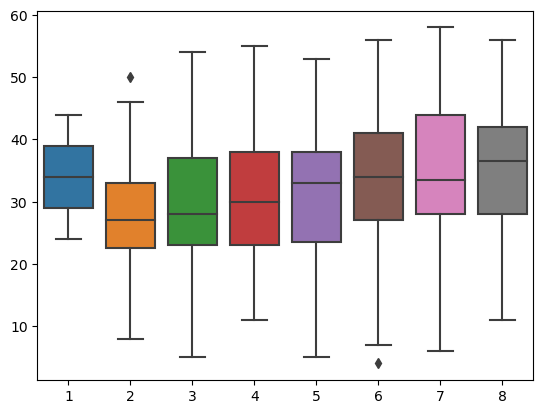

In [346]:
sns.boxplot(data= df_m, x= edu_m, y= m_grades)

<Axes: >

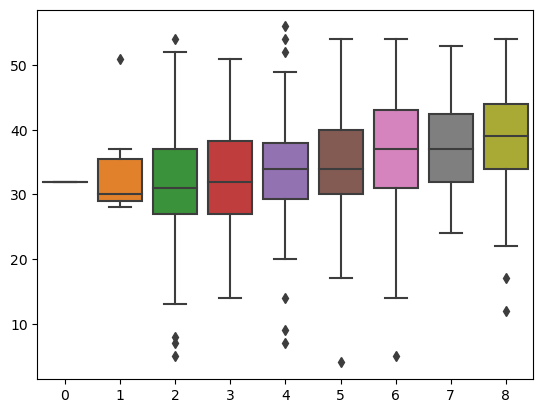

In [347]:
sns.boxplot(data=df_p, x=edu_p, y= p_grades)